#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213070003, 213070014
4. Write your names here: Shivam Ashish Patil, Ram Akshayver Pal
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**



#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Normalize function 

Add your code in the cell below to normalize the independent variables, making them zero mean and unit variance.

In [54]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    normX = []  #Initialize the matrix normX
    if(X.ndim == 1):  # If the input is an array then normalization can be done in a single step
      normX = (X-np.mean(X))/np.std(X) #Normalize each value of the  array
    if(X.ndim == 2):  # If the input is a matrix
      cols = X.shape[1];  # Find the number of columns of matrix X
      for i in range(0,cols): # iterate through each column and normalize it
        normX.append((X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])) #Normalize each value of the  array and append to the 
    return np.transpose(normX) #return the transpose of the normalized matrix to match it with given matrix in test case
    raise NotImplementedError()

In [55]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [56]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input data matrix X and weight vector w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    pred = np.dot(X,np.transpose(w)) # To compute the prediction multiply X*transpose(w)
    return pred #return the predicted value
    raise NotImplementedError()

In [57]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [58]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    pred = Prediction(X,w); # Using the Prediction() function defined above find the prediction for given X
    MSEerror = np.sum(np.square(pred-t))/len(t);  # Find the mean square error for each element of predicted array pred and take the mean square error 
    return MSEerror # Return the MSE error 
    raise NotImplementedError()

In [59]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [60]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    MAE_error = np.sum(abs(pred-t))/len(t)  #Find the absolute difference between predicted and true values then take their squares and divide by length of array t to get mean absolute error 
    return MAE_error #Return the error value
    raise NotImplementedError()

In [61]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [62]:
def L2_Loss (X, t, w, lamda): # Output should be a single number
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    L2_error = np.sum(np.square(pred-t))/len(t) + np.sqrt(np.sum(np.square(w[:-1])))*lamda
    #First find squared error between prediction and actual value then sum all elements in the resultant array
    #Add the L2 norm of weight array w exclude the last 1 in w
    return L2_error # Return L2 error
    raise NotImplementedError()

In [63]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [64]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    L1_error = np.sum(np.square(pred-t))/len(t) + np.sum(np.abs(w[:-1]))*lamda
    #First find squared error between prediction and actual value then sum all elements in the resultant array
    #Add the L1 norm of weight array w exclude the last 1 in w    
    return L1_error
    raise NotImplementedError()

In [65]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [66]:
def NRMSE_Loss (X, t, w): # Output should be a single number
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    RMSE = np.sqrt(np.sum(np.square(pred-t))/len(t))  
    # RMSE is the root mean square error of predicted-actual value
    NRMSE = RMSE/np.std(t)  #We divide the RMSE by std. deviation of actual values to obtain normalized RMSE
    return NRMSE  #Return the NRMSE
    raise NotImplementedError()

In [67]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Loss(X,t,w),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [68]:
def MSE_Gradient (X, t, w, lamda=0):
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    error = pred-t  # Error = predicted output-actual output
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    gradient = (2/len(t))*np.dot(np.transpose(X),error) #Find the gradient as derivative of MSE_Loss function 
    return gradient #return gradient
    raise NotImplementedError()

In [69]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [70]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    gradient = (1/len(t))*np.dot(np.transpose(X),np.divide(pred-t,np.abs(pred-t))) #This formula can be obtained if we apply partial derivative to MAE_Error function
    return gradient #return the calculated gradient
    raise NotImplementedError()

In [71]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [72]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    w[len(w)-1] = 0 #Make the last element i.e. 1 equal to 0 as it is not used in gradient calculation
    gradient = (2/len(t))*np.dot(np.transpose(X),pred-t) + lamda*w/np.sqrt(np.sum(np.square(w[:-1]))) #Compute the gradient, this result is obtained by differentiation of L2_loss function
    return gradient #Return radient function
    raise NotImplementedError()

In [73]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [74]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    pred = Prediction(X,w)  # Using the Prediction() function defined above find the prediction for given input X
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    #w[len(w)-1] = 0 #Make the last element i.e. 1 equal to 0 as it is not used in gradient calculation
    gradient = (2/len(t))*np.dot(np.transpose(X),pred-t) + lamda*np.divide(w,np.abs(w)) #This formula for gradient can be obtained by differentiating L1_Gradient
    dotProd = (2/len(t))*np.dot(np.transpose(X),pred-t) #matrix multiplication of transpose(X)*(pred-t) useful for further calculations
    gradient[len(w)-1] = dotProd[len(w)-1]  # Last element of gradient vector should not include the w array's contribuation
    return gradient #Return the gradient
    raise NotImplementedError()

In [75]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [76]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    loss = np.zeros(max_iter)  # Define an array for storing L2 loss for each updated w vector in below for loop
    for i in range(max_iter):  # For loop to iterate through the maximum no of iterations for gradient descent
      grad = gradfunc(X, t, w, lamda)  #Find the gradient vector for each iteration
      temp_w = w -  lr*grad  #All elements of w are updated in each iteration
      loss[i] =  lossfunc(X, t, w, lamda) #L2_Loss function for w in current iteration
      if (i>0 and abs(loss[i]-loss[i-1])<epsilon): #Stop gradient descent when maxiterations are over or when consecutive losses are less than epsilon
        break;
      w = temp_w #Update w vector
    w_final = w  
    train_loss_final = lossfunc(X, t, w_final, lamda)  #find training MSE using given loss function
    validation_loss_final = lossfunc(X_val,t_val,w_final,lamda) #find validation MSE using given loss function
    validation_NRMSE = np.sqrt(validation_loss_final)/np.std(t_val) # Validation NRMSE = RMSE/(std deviation)
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    raise NotImplementedError()

In [77]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

In [78]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    X = np.c_[X,np.ones(X.shape[0])]  #Append ones to each row of X
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + lamda*np.identity(X.shape[1])),np.dot(np.transpose(X),t)) 
    return w  #return the parameter array
    raise NotImplementedError()

In [79]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#Save the code above this as a RollNo1_RollNo2_1.py file after running the test blocks to make sure there are no errors.

#**... Part 1 ends**
Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file (part 1 and part 2), .py file (part 1 only), and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [80]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')

In [81]:
#Separate input matrix and output matrix
#Referred from: https://www.askpython.com/python/examples/split-data-training-and-testing-set
t = data.Next_Tmax #here we define the output variable
# To separate input from output we need to drop the output column from the dataframe to create an input vector
x = data.drop('Next_Tmax', axis = 1)

In [82]:
#Normalize the input data frame
inputTrainingMean = x.mean() #mean and std. deviation of training data 
inputTrainingSd = x.std() #Standard deviation of training data 
x = (x - x.mean())/x.std() #Normalize all features in x to make them 0 mean and std dev = 1
targetTrainingMean = t.mean() #Mean of training target data
targetTrainingSd = t.std()  #Std deviation of training target data
t = (t-t.mean())/t.std()  # normalize the target variable

In [83]:
#Separate the input vector x into training and validation data in 80:20 ratio
x_len = x.shape[0]  #number of rows in matrix x
x_width = x.shape[1]  #number of columns in matrix x
x_train = x.head(round(0.8*x_len))  #take first 80% (=4866) rows of x matrix as training data
x_val = x.tail(x_len - round(0.8*x_len))  #take last 20% (=1216) rows of x matrix as validation data

#Separate the target vector y into training and validation data in 80:20 ratio
t_len = t.shape[0]  #number of rows in matrix y
t_width = 1   #number of columns in matrix y
t_train = t.head(round(0.8*t_len))  #take first 80% (=4866) rows of y matrix as training data
t_val = t.tail(t_len - round(0.8*t_len))  #take last 20% (=1216) rows of y matrix as validation data

**Part 2 Question 3 begins : MSE+lamda*L2(w)**

In [84]:
'''
Initialization of different arrays and variables for TASK 3,4 and 5
'''
lamda = 10 #Assume initial lamda parameter
maxiter = 200 # maximum number of iterations for gradient descent
numLamdaVals = 6  #define the number of lamda values you are going to test
lamdaArray = np.zeros(numLamdaVals)  #An array to store the different lamda values
trainingRMSE = np.zeros(numLamdaVals)  #size of training MSE array = number of lamda values
validationRMSE = np.zeros(numLamdaVals)  #An array to store validation MSE
L = 0.1  #Assume learning rate 

In [85]:
'''
Training the model using gradient descent for each lamda
'''

for lCount in range(0,numLamdaVals):  #This for loop is to train model for each lamda value
  w = np.ones(x_train.shape[1]+1) #Weights vector has one dimension more than the number of features in x matrix
  L2_loss = np.zeros(maxiter)  # Define an array for storing L2 loss for each updated w vector in below for loop
  lamdaArray[lCount] = lamda  #lamda array stores the lamda value
  for i in range(maxiter):  # For loop to iterate through the maximum no of iterations for gradient descent
    grad = L2_Gradient(x_train, t_train, w, lamda)  #Find the gradient vector for each iteration
    temp_w = w -  L*grad  #All elements of w are updated in each iteration
    w = temp_w #store the updated w
    L2_loss[i] =  L2_Loss(x_train, t_train, w, lamda) #L2_Loss function for w in current iteration
  trainingRMSE[lCount] = np.sqrt(MSE_Loss(x_train, t_train, w, lamda))  #for each lamda find training MSE
  validationRMSE[lCount] = np.sqrt(MSE_Loss(x_val,t_val,w,lamda)) #for each lamda find validation MSE
  lamda = lamda/10  # Update lamda by dividing it by a factor of 10

In [86]:
'''
Finding minimum training RMSE and corresponding index in trainingRMSE array
'''
minTrainRMSE = min(trainingRMSE)  #Find out the minimum training MSE
print('Min. Training RMSE =',minTrainRMSE)  #Print the minimum training MSE
for i in range(0,numLamdaVals): #This for loop finds the array index corresponding to minimum Training MSE
  if(trainingRMSE[i] == minTrainRMSE):  
    minTrainMSEindex = i    
    break

Min. Training RMSE = 0.45241765488595315


Training RMSE: [2.26661241 0.58261445 0.46080682 0.45259575 0.45242167 0.45241765]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


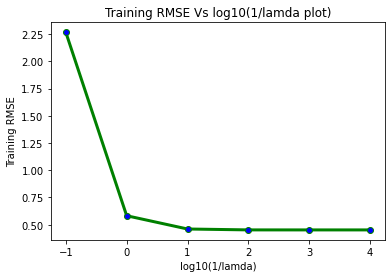

In [87]:
'''
Plotting Training RMSE vs 1/lamda
''' 
print('Training RMSE:',trainingRMSE)
print('1/lamda Array: ',1./lamdaArray)
plt.figure()
plt.title('Training RMSE Vs log10(1/lamda plot)')
plt.xlabel('log10(1/lamda)')
plt.ylabel('Training RMSE')
plt.plot(np.log10(1./lamdaArray),trainingRMSE,color='green', linestyle='-', linewidth = 3,marker='o', markerfacecolor='blue', markersize=6)
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.show()

In [88]:
'''
Finding minimum validation MSE and corresponding index in validationMSE array
'''
minValidationRMSE = min(validationRMSE)   #Find out the minimum validation MSE
for i in range(0,numLamdaVals): 
  if(validationRMSE[i] == minValidationRMSE):
    minValidationMSEindex = i    
    break
optimumLamda = lamdaArray[minValidationMSEindex] #Optimum Lamda corresponds to lamda value at mimimum Validation MSE Index

Valdation RMSE: [2.59571827 0.72630327 0.46646787 0.47700122 0.47948328 0.47974907]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
Best lamda which gives min. Validation RMSE =  0.1
Validation RMSE for best lamda =  0.4664678674231005
Validation NRMSE for best lamda =  0.377994227709594


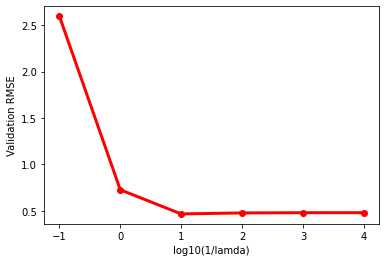

In [89]:
'''
Plotting Validation MSE vs 1/lamda
'''
print('Valdation RMSE:',validationRMSE)
print('1/lamda Array: ',1./lamdaArray)
print('Best lamda which gives min. Validation RMSE = ',optimumLamda)
print('Validation RMSE for best lamda = ',validationRMSE[minValidationMSEindex]) # Validation MSE corresponding to best lamda
print('Validation NRMSE for best lamda = ',validationRMSE[minValidationMSEindex]/np.std(t_val))  # Validation NMSE corresponding to best lamda
plt.figure()
plt.xlabel('log10(1/lamda)')
plt.ylabel('Validation RMSE')
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.plot(np.log10(1./lamdaArray),validationRMSE,color='red', linestyle='-', linewidth = 3,marker='o', markerfacecolor='red', markersize=6)
plt.show()

In [90]:
'''
Using optimum lamda we will run gradient descent on training data and find the best w vector
'''
w = np.ones(x_train.shape[1]+1) #Weights vector has one dimension more than the number of features in x matrix
for i in range(maxiter): #This for loop finds the array index corresponding to minimum Validation MSE
  grad = L2_Gradient(x_train, t_train, w, optimumLamda) #
  temp_w = w -  L*grad
  w = temp_w  
  L2_loss[i] =  L2_Loss(x_train, t_train, w, optimumLamda) #L2_Loss function
print('Best weight vector for optimum lamda = ',w)
wTest = w #This w will be used for testing the model in Question 6

Best weight vector for optimum lamda =  [ 1.23749963e-01  4.27260595e-02  3.90310926e-02 -3.04588077e-02
  4.40957959e-01  1.52473587e-01 -1.08650241e-01  8.37903975e-02
 -1.24124148e-01 -6.38478641e-02 -7.46160812e-02 -8.86831090e-02
 -2.70784135e-02  7.09598337e-02  1.21154155e-03  2.45364430e-04
 -1.78292387e-02 -2.45968336e-02 -5.97766455e-02  6.84466742e-02
  4.22290140e-02 -5.05792878e-03]


**Observations for Part 2 Question 3:**

1) For** Learning Rate L = 1**:

Training RMSE: [inf inf inf inf inf inf]

1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

Valdation RMSE: [inf inf inf inf inf inf]

Clearly learning rate of 1 is not an optimum choice

2)For **Learning Rate L = 0.1**:

Training RMSE: [2.26661241 0.58261445 0.46080682 0.45259575 0.45242167 0.45241765]

1/lamda Array: [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

Valdation RMSE: [2.59571827 0.72630327 0.46646787 0.47700122 0.47948328 0.47974907](Min. validation MSE occurs at: **lamda = 0.1**)

3)For **Learning Rate L = 0.01**: 

Training RMSE: [0.88159037 0.5795732  0.46292016 0.4647183  0.46509646 0.46513624]

1/lamda Array: [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04] 

Valdation RMSE: [1.21536351 0.71500768 0.45982222 0.46406411 0.46480869 0.46488615] (Min. validation MSE occurs at: **lamda = 0.1**)

Therefore, the minimum validation RMSE occurs at lamda = 0.1. Learning Rate of 0.1 and 0.01 have approximately same validation RMSE for lamda = 0.1. Since Learning rate of 0.1 needs lesser number of iterations to converge, learning rate of 0.1 will be optimum.



**Part 2 Question 4 Starts:  MSE+lamda*L1(w)**

In [91]:
'''
Initialization of different arrays and variables for TASK 3,4 and 5
'''
lamda = 10 #Assume initial lamda parameter
maxiter = 200 # maximum number of iterations for gradient descent
numLamdaVals = 6  #define the number of lamda values you are going to test
lamdaArray = np.zeros(numLamdaVals)  #An array to store the different lamda values
trainingRMSE = np.zeros(numLamdaVals)  #size of training MSE array = number of lamda values
validationRMSE = np.zeros(numLamdaVals)  #An array to store validation MSE
L = 0.1  #Assume learning rate 

In [92]:
'''
Training the model using gradient descent for each lamda
'''
for lCount in range(0,numLamdaVals):  #This for loop is to train model for each lamda value
  w = np.ones(x_train.shape[1]+1) #Weights vector has one dimension more than the number of features in x matrix
  L1_loss = np.zeros(maxiter)  # Define an array for storing L2 loss for each updated w vector in below for loop
  lamdaArray[lCount] = lamda  #lamda array stores the lamda value
  for i in range(maxiter):  # For loop to iterate through the maximum no of iterations for gradient descent
    grad = L1_Gradient(x_train, t_train, w, lamda)  #Find the gradient vector for each iteration
    temp_w = w -  L*grad  #All elements of w are updated in each iteration
    w= temp_w #store the updated w
    L1_loss[i] =  L1_Loss(x_train, t_train, w, lamda) #L2_Loss function for w in current iteration
  trainingRMSE[lCount] = np.sqrt(MSE_Loss(x_train, t_train, w, lamda))  #for each lamda find training MSE
  validationRMSE[lCount] = np.sqrt(MSE_Loss(x_val,t_val,w,lamda)) #for each lamda find validation MSE
  lamda = lamda/10  # Update lamda by dividing it by a factor of 10

In [93]:
'''
Finding minimum training RMSE and corresponding index in trainingRMSE array
'''
minTrainRMSE = min(trainingRMSE)  #Find out the minimum training MSE
print('Min. Training RMSE =',minTrainRMSE)  #Print the minimum training MSE
for i in range(0,numLamdaVals): #This for loop finds the array index corresponding to minimum Training MSE
  if(trainingRMSE[i] == minTrainRMSE):
    minTrainMSEindex = i    
    break

Min. Training RMSE = 0.4518543295892992


Training RMSE: [8.14217193 0.70561497 0.4854272  0.45295417 0.45186751 0.45185433]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


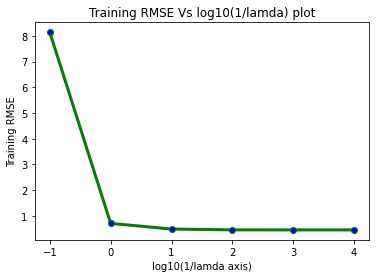

In [94]:
'''
Plotting Training RMSE vs log10(1/lamda)
''' 
print('Training RMSE:',trainingRMSE)
print('1/lamda Array: ',1./lamdaArray)
plt.figure()
plt.title('Training RMSE Vs log10(1/lamda) plot')
plt.xlabel('log10(1/lamda axis)')
plt.ylabel('Training RMSE')
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.plot(np.log10(1./lamdaArray),trainingRMSE,color='green', linestyle='-', linewidth = 3,marker='o', markerfacecolor='blue', markersize=6)
plt.show()

In [95]:
'''
Finding minimum validation MSE and corresponding index in validationMSE array
'''
minValidationRMSE = min(validationRMSE)   #Find out the minimum validation MSE
for i in range(0,numLamdaVals): #Find the array index corresponding to minimum validation MSE
  if(validationRMSE[i] == minValidationRMSE):
    minValidationMSEindex = i    
    break
optimumLamda = lamdaArray[minValidationMSEindex] #Optimum Lamda corresponds to lamda value at mimimum Validation MSE Index

Valdation RMSE: [9.40565994 0.84644062 0.5308134  0.48420429 0.48719127 0.4876578 ]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
Best lamda which gives min. Validation RMSE =  0.01
Validation RMSE for best lamda =  0.48420429133526205
Validation NRMSE for best lamda =  0.3923666343150988


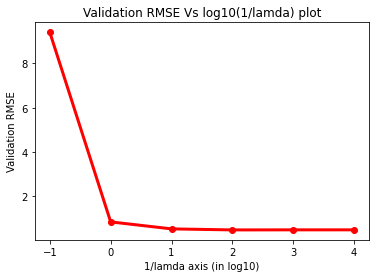

In [96]:
'''
Plotting Validation RMSE vs log10(1/lamda)
'''
print('Valdation RMSE:',validationRMSE)
print('1/lamda Array: ',1./lamdaArray)
print('Best lamda which gives min. Validation RMSE = ',optimumLamda)
print('Validation RMSE for best lamda = ',validationRMSE[minValidationMSEindex]) # Validation MSE corresponding to best lamda
print('Validation NRMSE for best lamda = ',validationRMSE[minValidationMSEindex]/np.std(t_val))  # Validation NMSE corresponding to best lamda
plt.figure()
plt.title('Validation RMSE Vs log10(1/lamda) plot')
plt.xlabel('1/lamda axis (in log10)')
plt.ylabel('Validation RMSE')
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.plot(np.log10(1./lamdaArray),validationRMSE,color='red', linestyle='-', linewidth = 3,marker='o', markerfacecolor='red', markersize=6)
plt.show()

In [97]:
'''
Using optimum lamda we will run gradient descent on training data and find the best w vector
'''
w = np.ones(x_train.shape[1]+1) #Weights vector has one dimension more than the number of features in x matrix
for i in range(maxiter): #This for loop finds the array index corresponding to minimum Validation MSE
  grad = L1_Gradient(x_train, t_train, w, optimumLamda) #find the gradient for L1 gradient
  temp_w = w -  L*grad  #Gradient descent
  w = temp_w
  L2_loss[i] =  L2_Loss(x_train, t_train, w, optimumLamda) #L2_Loss function

print('Best weight vector for optimum lamda = ',w)

Best weight vector for optimum lamda =  [ 0.12680125  0.01947031  0.13547737 -0.03108436  0.6263373   0.052992
 -0.10063052  0.08023213 -0.13458817 -0.02803836 -0.0563221  -0.10138192
 -0.0262361   0.06613126 -0.00183205  0.00065672 -0.02246    -0.03263323
 -0.05975272  0.06745347  0.027235   -0.02959989]


**Observations for Part 2 Question 4:**

1) For** Learning Rate L = 1**:

Training RMSE: [inf inf inf inf inf inf]

1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

Valdation RMSE: [inf inf inf inf inf inf]

Clearly learning rate of 1 is not an optimum choice

2)For **Learning Rate L = 0.1**:

Training RMSE: [8.14217193 0.70561497 0.4854272  0.45295417 0.45186751 0.45185433]

1/lamda Array: [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

Valdation RMSE: [9.40565994 0.84644062 0.5308134  0.48420429 0.48719127 0.4876578 ](Min. validation MSE occurs at: **lamda = 0.01**)

3)For **Learning Rate L = 0.01**: 

Training RMSE:[0.98130594 0.72470278 0.48844081 0.46700743 0.46721147 0.46728953]

1/lamda Array: [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04] 

Valdation RMSE: [1.29992238 1.0202405  0.48901306 0.45705873 0.45877743 0.45902394] (Min. validation MSE occurs at: **lamda =0.01**)

Therefore, the minimum validation RMSE occurs at lamda = 0.01. Learning Rate of 0.1 and 0.01 have approximately same validation RMSE for lamda = 0.1. Since Learning rate of 0.1 needs lesser number of iterations to converge than learning rate of 0.01 , learning rate of 0.1 will be optimum.



**Part 2 Question 5 Starts "best lamda for the pseudo-inv method"**

In [98]:
'''
Initialization of different arrays and variables for TASK 3,4 and 5
'''
lamda = 10 #Assume initial lamda parameter
numLamdaVals = 6  #define the number of lamda values you are going to test
lamdaArray = np.zeros(numLamdaVals)  #An array to store the different lamda values
trainingRMSE = np.zeros(numLamdaVals)  #size of training MSE array = number of lamda values
validationRMSE = np.zeros(numLamdaVals)  #An array to store validation MSE 

In [99]:
'''
Training the model using gradient descent for each lamda
'''
for lCount in range(0,numLamdaVals):  #This for loop is to train model for each lamda value
  w = Pseudo_Inverse (x_train, t_train, lamda)  #Find the pseudo inverse to get w vector
  lamdaArray[lCount] = lamda  #lamda array stores the lamda value
  trainingRMSE[lCount] = np.sqrt(MSE_Loss(x_train, t_train, w, lamda))  #for each lamda find training MSE
  validationRMSE[lCount] = np.sqrt(MSE_Loss(x_val,t_val,w,lamda)) #for each lamda find validation MSE
  lamda = lamda/10  # Update lamda by dividing it by a factor of 10

In [100]:
'''
Finding minimum training RMSE and corresponding index in trainingRMSE array
'''
minTrainRMSE = min(trainingRMSE)  #Find out the minimum training MSE
print('Min. Training RMSE =',minTrainRMSE)  #Print the minimum training MSE
for i in range(0,numLamdaVals): #This for loop finds the array index corresponding to minimum Training MSE
  if(trainingRMSE[i] == minTrainRMSE):
    minTrainMSEindex = i    
    break

Min. Training RMSE = 0.45185313890878837


Training RMSE: [0.45187014 0.45185332 0.45185314 0.45185314 0.45185314 0.45185314]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


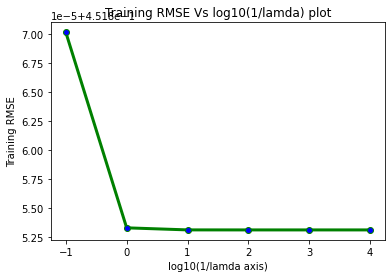

In [101]:
'''
Plotting Training RMSE vs log10(1/lamda)
''' 
print('Training RMSE:',trainingRMSE)
print('1/lamda Array: ',1./lamdaArray)
plt.figure()
plt.title('Training RMSE Vs log10(1/lamda) plot')
plt.xlabel('log10(1/lamda axis)')
plt.ylabel('Training RMSE')
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.plot(np.log10(1./lamdaArray),trainingRMSE,color='green', linestyle='-', linewidth = 3,marker='o', markerfacecolor='blue', markersize=6)
plt.show()

In [102]:
'''
Finding minimum validation MSE and corresponding index in validationMSE array
'''
minValidationRMSE = min(validationRMSE)   #Find out the minimum validation MSE
for i in range(0,numLamdaVals): #
  if(validationRMSE[i] == minValidationRMSE):
    minValidationMSEindex = i    
    break
optimumLamda = lamdaArray[minValidationMSEindex] #Optimum Lamda corresponds to lamda value at mimimum Validation MSE Index

Valdation RMSE: [0.4870014  0.48775813 0.4878367  0.48784459 0.48784538 0.48784546]
1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
Best lamda which gives min. Validation RMSE =  10.0
Validation RMSE for best lamda =  0.4870014034737439
Validation NRMSE for best lamda =  0.39463322611367935


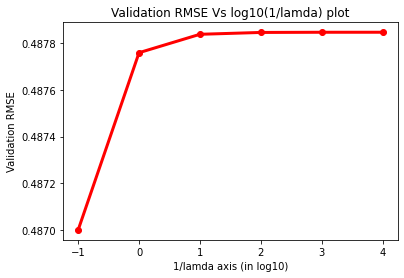

In [103]:
'''
Plotting Validation RMSE vs 1/lamda
'''
print('Valdation RMSE:',validationRMSE)
print('1/lamda Array: ',1./lamdaArray)
print('Best lamda which gives min. Validation RMSE = ',optimumLamda)
print('Validation RMSE for best lamda = ',validationRMSE[minValidationMSEindex]) # Validation MSE corresponding to best lamda
print('Validation NRMSE for best lamda = ',validationRMSE[minValidationMSEindex]/np.std(t_val))  # Validation NMSE corresponding to best lamda
plt.figure()
plt.title('Validation RMSE Vs log10(1/lamda) plot')
plt.xlabel('1/lamda axis (in log10)')
plt.ylabel('Validation RMSE')
#Since consecutive lamda values vary by large gaps we have plotted them on log scale on x axis
plt.plot(np.log10(1./lamdaArray),validationRMSE,color='red', linestyle='-', linewidth = 3,marker='o', markerfacecolor='red', markersize=6)
plt.show()

**Observations for Part 2 Question 5:**
Valdation RMSE: [0.4870014  0.48775813 0.4878367  0.48784459 0.48784538 0.48784546]

1/lamda Array:  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

Best lamda which gives min. Validation RMSE =  10.0

Therefore, the minimum validation RMSE occurs at lamda = 10. This method is not computationally efficient and hence generally not used for gradient descent. In this method as we decrease lamda we get a very small increase in RMSE.

**Conclusion:**
The best lamda = 0.1 it gives the minimum validation RMSE in case of **MSE+L2_loss(w)** model. We will use this model to predict the output from our test data.


**Part 2 Question 6 "Running the gradient descent on test.csv"**

In [104]:
'''
Optimum Learning rate, lamda which give min validation NMSE for the L2_loss, L1_loss are used to predict the putput for test data
Minimum validation RMSE is obtained for gradient descent using L2 Loss function 
for optimum learning rate = 0.1 and lamda = 0.1
'''

'''
NOTE: After training, our learning algorithm has learnt to deal with the data in scaled form, so we have to normalize our test data with the 
normalizing parameters used for training data.
Source: https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well#:~:text=Yes%20you%20need%20to%20apply,is%20part%20of%20the%20representation.
Both answers given on this link answer this. And this method gives very accurate results.
'''
x = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv')  #Read the test data from given link
x = (x-inputTrainingMean)/inputTrainingSd #Normalize the test data using training mean and std dev
#h_theta is the predicted output by our model
h_theta = Prediction (x, wTest) #Predict the output using wTest from MSE + L2_loss function as it gives minimum RMSE error
h_theta = h_theta*targetTrainingSd + targetTrainingMean #targetTrainingSd and targetTrainingMean were defined initially when we read training data from TempTrain.csv
#To remove normalization from the estimated vector h_theta by multiplying the training target standard deviation and adding target training mean to predicted result
print(h_theta)  
df = pd.DataFrame(h_theta)  #Convert the array into a pandas data frame in order to write it as a .csv file
#df.to_csv('213070003_213070014_1.csv',header=['Next_Tmax'], index=False)

[27.50469838 29.46376179 29.65101026 ... 27.81126658 27.88646396
 27.76888317]


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code) :  Satyabrata Sahu (Roll no: 213070015) 

2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 

https://www.askpython.com/python/examples/split-data-training-and-testing-set

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re#:~:text=Yes%2C%20you%20do%20need%20to%20scale%20the%20target%20variable.

Need to normalize the test data explained here:
https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well#:~:text=Yes%20you%20need%20to%20apply,is%20part%20of%20the%20representation.